In [1]:
import pandas as pd
train = pd.read_csv('./dataset/train.csv', index_col='PassengerId')

In [8]:
train.shape

(891, 11)

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('./dataset/test.csv', index_col='PassengerId')

In [9]:
test.shape

(418, 10)

In [10]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
import seaborn as sb

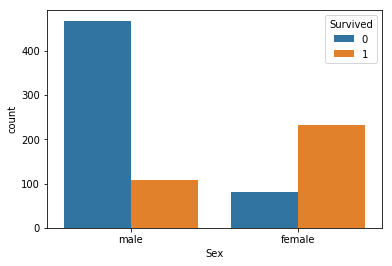

In [12]:
sb.countplot(data=train, x="Sex", hue="Survived")

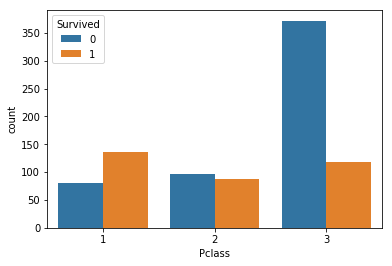

In [14]:
sb.countplot(data=train, x="Pclass", hue="Survived")

In [15]:
#等級３は、亡くなった人の割合が多い

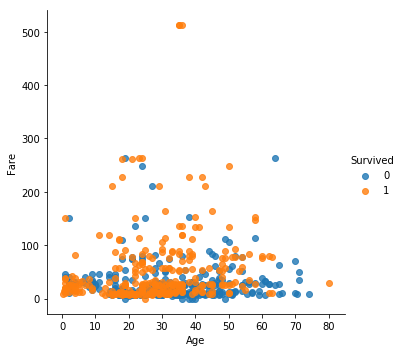

In [17]:
sb.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

In [50]:
train.loc[train['Sex'] == 'male', 'Sex_encode'] = 0

In [51]:
test.loc[test['Sex'] == 'male', 'Sex_encode'] = 0

In [52]:
train.loc[train['Sex'] == 'female', 'Sex_encode'] = 1

In [53]:
test.loc[test['Sex'] == 'female', 'Sex_encode'] = 1

In [54]:
train.shape

(891, 14)

In [55]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Fare_fillin,Student
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,7.2500,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,71.2833,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,7.9250,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,53.1000,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,8.0500,False


In [56]:
low_fare = train[train['Fare'] < 100]

In [57]:
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_fillin,Student,Sex_encode
PassengerId,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0,False,0.0


In [58]:
train["Fare_fillin"] = train['Fare']

In [59]:
test['Fare_fillin'] = test['Fare']

In [60]:
test.loc[test['Fare'].isnull(), "Fare_fillin"] = 0

In [61]:
test.loc[test['Fare'].isnull(), ['Fare', 'Fare_fillin']]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


In [62]:
train.shape

(891, 14)

In [63]:
train['Student'] = train['Age'] < 20

In [64]:
train.shape

(891, 14)

In [65]:
train[['Age', 'Student']].head(5)

,Age,Student
PassengerId,,
1,22.0,False
2,38.0,False
3,26.0,False
4,35.0,False
5,35.0,False


In [66]:
test.shape

(418, 13)

In [67]:
test['Student'] = test['Age'] < 20

In [68]:
test.shape

(418, 13)

In [69]:
test[['Age', 'Student']].head(5)

,Age,Student
PassengerId,,
892,34.5,False
893,47.0,False
894,62.0,False
895,27.0,False
896,22.0,False


In [70]:
label_name = 'Survived'

In [71]:
label_name

'Survived'

In [72]:
feature_names = ['Pclass', 'Sex_encode', 'Fare_fillin', 'Student']

In [73]:
feature_names

['Pclass', 'Sex_encode', 'Fare_fillin', 'Student']

In [74]:
X_train = train[feature_names]

In [75]:
X_train.shape

(891, 4)

In [76]:
X_train.head()

,Pclass,Sex_encode,Fare_fillin,Student
PassengerId,,,,
1,3,0.0,7.2500,False
2,1,1.0,71.2833,False
3,3,1.0,7.9250,False
4,1,1.0,53.1000,False
5,3,0.0,8.0500,False


In [77]:
test[test['Pclass'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_fillin,Student,Sex_encode
PassengerId,,,,,,,,,,,,,


In [78]:
X_test = test[feature_names]

In [79]:
Y_train = train[label_name]

In [80]:
X_test.head()

,Pclass,Sex_encode,Fare_fillin,Student
PassengerId,,,,
892,3,0.0,7.8292,False
893,3,1.0,7.0000,False
894,2,0.0,9.6875,False
895,3,0.0,8.6625,False
896,3,1.0,12.2875,False


In [81]:
Y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
model = DecisionTreeClassifier(max_depth=8, random_state=0)

In [84]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [85]:
from sklearn.metrics import precision_score

In [86]:
predictions = model.predict(X_test)

In [87]:
submission = pd.read_csv('./dataset/gender_submission.csv', index_col='PassengerId')

In [88]:
submission.shape

(418, 1)

In [89]:
submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [90]:
submission.to_csv('submit_20190504.csv')